#### Answer1

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
#reading the dataset
noisy = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 1/noisy_data.csv")
noisy.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [84]:
#checking missing values
noisy.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

* We can see that there is 1 missing value for Age and 1 missing value for Income

#### Handling missing values by Mean imputation 

In [85]:
from sklearn.impute import SimpleImputer
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
noisy.iloc[:, 1:3] = imputa.fit_transform(noisy.iloc[:, 1:3])

print(noisy)

   Region        Age        Income Online Shopper
0   India  49.000000  86400.000000             No
1  Brazil  32.000000  57600.000000            Yes
2     USA  35.000000  64800.000000             No
3  Brazil  43.000000  73200.000000             No
4     USA  45.000000  76533.333333            Yes
5   India  40.000000  69600.000000            Yes
6  Brazil  43.777778  62400.000000             No
7   India  53.000000  94800.000000            Yes
8     USA  55.000000  99600.000000             No
9   India  42.000000  80400.000000            Yes


* we can see that missing value of Age and Income column are replaced by the mean value of that column

### Shapiro-Wilk normality test

#### On age column

In [86]:
#h0(null hypothesis) = data is age column follows a normal distribuition
#h1(Alternate hypothesis) = data is age column does not follow normal distribution

from scipy.stats import shapiro
age = noisy['Age']
stat, p = shapiro(age)
print(f'Shapiro-Wilk test for normality on Age: stat={stat:.3f}, p={p:.3f}')

Shapiro-Wilk test for normality on Age: stat=0.971, p=0.902


* Here we see that our p value for Shapiro wilk test on age column is 0.902 which is greater than 0.05  i.e, p>0.05
* if p>0.05 we fail to reject null hypothesis 
* which means, data in age column follows a normal distribuition.

#### On Income column

In [87]:
#h0(null hypothesis) = data is income column follows a normal distribuition
#h1(Alternate hypothesis) = data is income column does not follow normal distribution

from scipy.stats import shapiro
income = noisy['Income']
stat, p = shapiro(income)
print(f'Shapiro-Wilk test for normality on Income: stat={stat:.3f}, p={p:.3f}')

Shapiro-Wilk test for normality on Income: stat=0.963, p=0.815


* Here we see that our p value for Shapiro wilk test on income column is 0.815 which is greater than 0.05  i.e, p>0.05
* if p>0.05 we fail to reject null hypothesis 
* which means, data in income column follows a normal distribuition.

### Encoding for categorical variable and scaling of features

In [68]:
# importing an array of features (first 3 columns of dataset)
x = noisy.iloc[:, :-1].values 
# importing an array of dependent variable ( last column(Online shopper) of dataset)
y = noisy.iloc[:, -1].values

In [69]:
# encoding Region column of dataset using one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [70]:
x

array([[0.0, 1.0, 0.0, 49.0, 86400.0],
       [1.0, 0.0, 0.0, 32.0, 57600.0],
       [0.0, 0.0, 1.0, 35.0, 64800.0],
       [1.0, 0.0, 0.0, 43.0, 73200.0],
       [0.0, 0.0, 1.0, 45.0, 76533.33333333333],
       [0.0, 1.0, 0.0, 40.0, 69600.0],
       [1.0, 0.0, 0.0, 43.77777777777778, 62400.0],
       [0.0, 1.0, 0.0, 53.0, 94800.0],
       [0.0, 0.0, 1.0, 55.0, 99600.0],
       [0.0, 1.0, 0.0, 42.0, 80400.0]], dtype=object)

In [71]:
#encoding online shopper column using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [72]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [89]:
print(noisy)

   Region        Age        Income Online Shopper
0   India  49.000000  86400.000000             No
1  Brazil  32.000000  57600.000000            Yes
2     USA  35.000000  64800.000000             No
3  Brazil  43.000000  73200.000000             No
4     USA  45.000000  76533.333333            Yes
5   India  40.000000  69600.000000            Yes
6  Brazil  43.777778  62400.000000             No
7   India  53.000000  94800.000000            Yes
8     USA  55.000000  99600.000000             No
9   India  42.000000  80400.000000            Yes


#### Scaling the features

In [90]:
from sklearn.preprocessing import StandardScaler

# columns to scale
scale = ['Age', 'Income']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
noisy[scale] = scaler.fit_transform(noisy[scale])

In [91]:
print(noisy)

   Region       Age    Income Online Shopper
0   India  0.758874  0.749473             No
1  Brazil -1.711504 -1.438178            Yes
2     USA -1.275555 -0.891265             No
3  Brazil -0.113024 -0.253200             No
4     USA  0.177609  0.000000            Yes
5   India -0.548973 -0.526657            Yes
6  Brazil  0.000000 -1.073570             No
7   India  1.340140  1.387538            Yes
8     USA  1.630773  1.752147             No
9   India -0.258340  0.293712            Yes


In [95]:
mean_age = noisy['Age'].mean()
standard_deviation_age = noisy['Age'].std()

mean_income = noisy['Income'].mean()
standard_deviation_income = noisy['Income'].std()
print(f"Mean of Age column: {mean_age}")
print(f"Standard Deviation of Age column: {standard_deviation_age}")
print(f"Mean of Income column: {mean_income}")
print(f"Standard Deviation of Income column: {standard_deviation_income}")


Mean of Age column: -8.881784197001253e-17
Standard Deviation of Age column: 1.0540925533894598
Mean of Income column: 3.608224830031759e-16
Standard Deviation of Income column: 1.0540925533894598


* we can see that our scaling worked as mean of each scaled column is closed to 0 and standard deviation is 1 

### Answer 2

In [103]:
! pip install nltk
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [104]:
with open("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 1/wiki.txt", "r") as text:
    content = text.read()
print(content)

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds"

In [109]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [111]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
#reading file
with open("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 1/wiki.txt", "r") as file:
    text = file.read()
#defining stop words
stop_words = set(stopwords.words('english'))

#defining punctuation symobols 
punct = set(punctuation)
punct.add("''")
punct.add("``")



In [139]:
# word_tokenize
tokens_word = word_tokenize(text)
tokens_word = [word for word in tokens_word if word.lower() not in stop_words and word not in punct]

print("word_tokenize tokens: ", tokens_word)


word_tokenize tokens:  ['history', 'NLP', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'Georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'Russian', 'sentences', 'English', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'However', 'real', 'progress', 'much', 'slower', 'ALPAC', 'report', '1966', 'found', 'ten-year-long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'Little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'successful', 'NLP', 'systems', 'developed', '1960s', 'SHRDLU', 'natural-lang

In [140]:
# RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens_regexp = tokenizer.tokenize(text)
tokens_regexp = [word for word in tokens_regexp if word.lower() not in stop_words and word not in punct]

print("RegexpTokenizer tokens: ", tokens_regexp)

RegexpTokenizer tokens:  ['history', 'NLP', 'generally', 'started', '1950s', 'although', 'work', 'found', 'earlier', 'periods', '1950', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'Georgetown', 'experiment', '1954', 'involved', 'fully', 'automatic', 'translation', 'sixty', 'Russian', 'sentences', 'English', 'authors', 'claimed', 'within', 'three', 'five', 'years', 'machine', 'translation', 'would', 'solved', 'problem', '2', 'However', 'real', 'progress', 'much', 'slower', 'ALPAC', 'report', '1966', 'found', 'ten', 'year', 'long', 'research', 'failed', 'fulfill', 'expectations', 'funding', 'machine', 'translation', 'dramatically', 'reduced', 'Little', 'research', 'machine', 'translation', 'conducted', 'late', '1980s', 'first', 'statistical', 'machine', 'translation', 'systems', 'developed', 'notably', 'successful', 'NLP', 'systems', 'developed', '1960s', 'SHRDLU', 'natu

#### Extracting years


In [128]:
import re

In [130]:
def yearext (text):
    pattern = r'\b\d{4}\b'
    years = re.findall(pattern,text)
    return years

print (yearext(text))

['1950', '1954', '1966', '1964', '1966']


#### Difference between output of tokenization methods

In [141]:
#number of tokens in word_tokenize
num_of_tokens1 = len(tokens_word)
print(num_of_tokens1)

133


In [142]:
#number of tokens in regexptokenizer
num_of_tokens2 = len(tokens_regexp)
print(num_of_tokens2)

137


* we can see that number of tokens generated by word_tokenize are 133 while tokens generated by regexptokenizer are 137. Regexptokenizer generated 4 more tokens

In [137]:
#checking the difference
diff = set(tokens_word) - set(tokens_regexp)
print("Difference:", diff)

Difference: {'human-like', 'natural-language', 'ten-year-long'}


* we can observe that tokens_word generated these as a single single tokens while regex tokenizer geneared them as individual tokens by breaking them down as human, like, natural, language, ten, year, long

### Question 3


In [180]:
#reading the dataset
df = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 1/archive/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [179]:
#check for missing value 
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [182]:
#getting numerical columns
numerical_cols = list(df.dtypes[df.dtypes != 'object'].index)
print(numerical_cols)


['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [183]:
#missing value in numerical columns
df[numerical_cols].isna().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [184]:
#imputing missing value with means
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[numerical_cols].isna().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [185]:
#finding categorical columns
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)
print(categorical_cols)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [186]:
#finding missing values
df[categorical_cols].isna().sum()

Suburb            0
Address           0
Type              0
Method            0
SellerG           0
Date              0
CouncilArea    1369
Regionname        0
dtype: int64

In [187]:
#imputing those values with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
df[categorical_cols].isna().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    0
Regionname     0
dtype: int64

In [188]:
#encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df = df.copy()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0.0,12794.0,2,0.0,1480000.0,1.0,23.0,45.0,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,31.0,-37.79960,144.99840,2.0,4019.0
1,0.0,5943.0,2,0.0,1035000.0,1.0,23.0,47.0,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,31.0,-37.80790,144.99340,2.0,4019.0
2,0.0,9814.0,3,0.0,1465000.0,3.0,23.0,48.0,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,31.0,-37.80930,144.99440,2.0,4019.0
3,0.0,9004.0,3,0.0,850000.0,0.0,23.0,48.0,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,31.0,-37.79690,144.99690,2.0,4019.0
4,0.0,10589.0,4,0.0,1600000.0,4.0,155.0,49.0,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,31.0,-37.80720,144.99410,2.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302.0,1991.0,4,0.0,1245000.0,1.0,16.0,33.0,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,23.0,-37.90562,145.16761,4.0,7392.0
13576,305.0,12234.0,3,0.0,1031000.0,3.0,251.0,33.0,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,23.0,-37.85927,144.87904,6.0,6380.0
13577,305.0,12745.0,3,0.0,1170000.0,1.0,194.0,33.0,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,23.0,-37.85274,144.88738,6.0,6380.0
13578,305.0,13311.0,4,0.0,2500000.0,0.0,222.0,33.0,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,23.0,-37.85908,144.89299,6.0,6380.0


### Correlation

<AxesSubplot:>

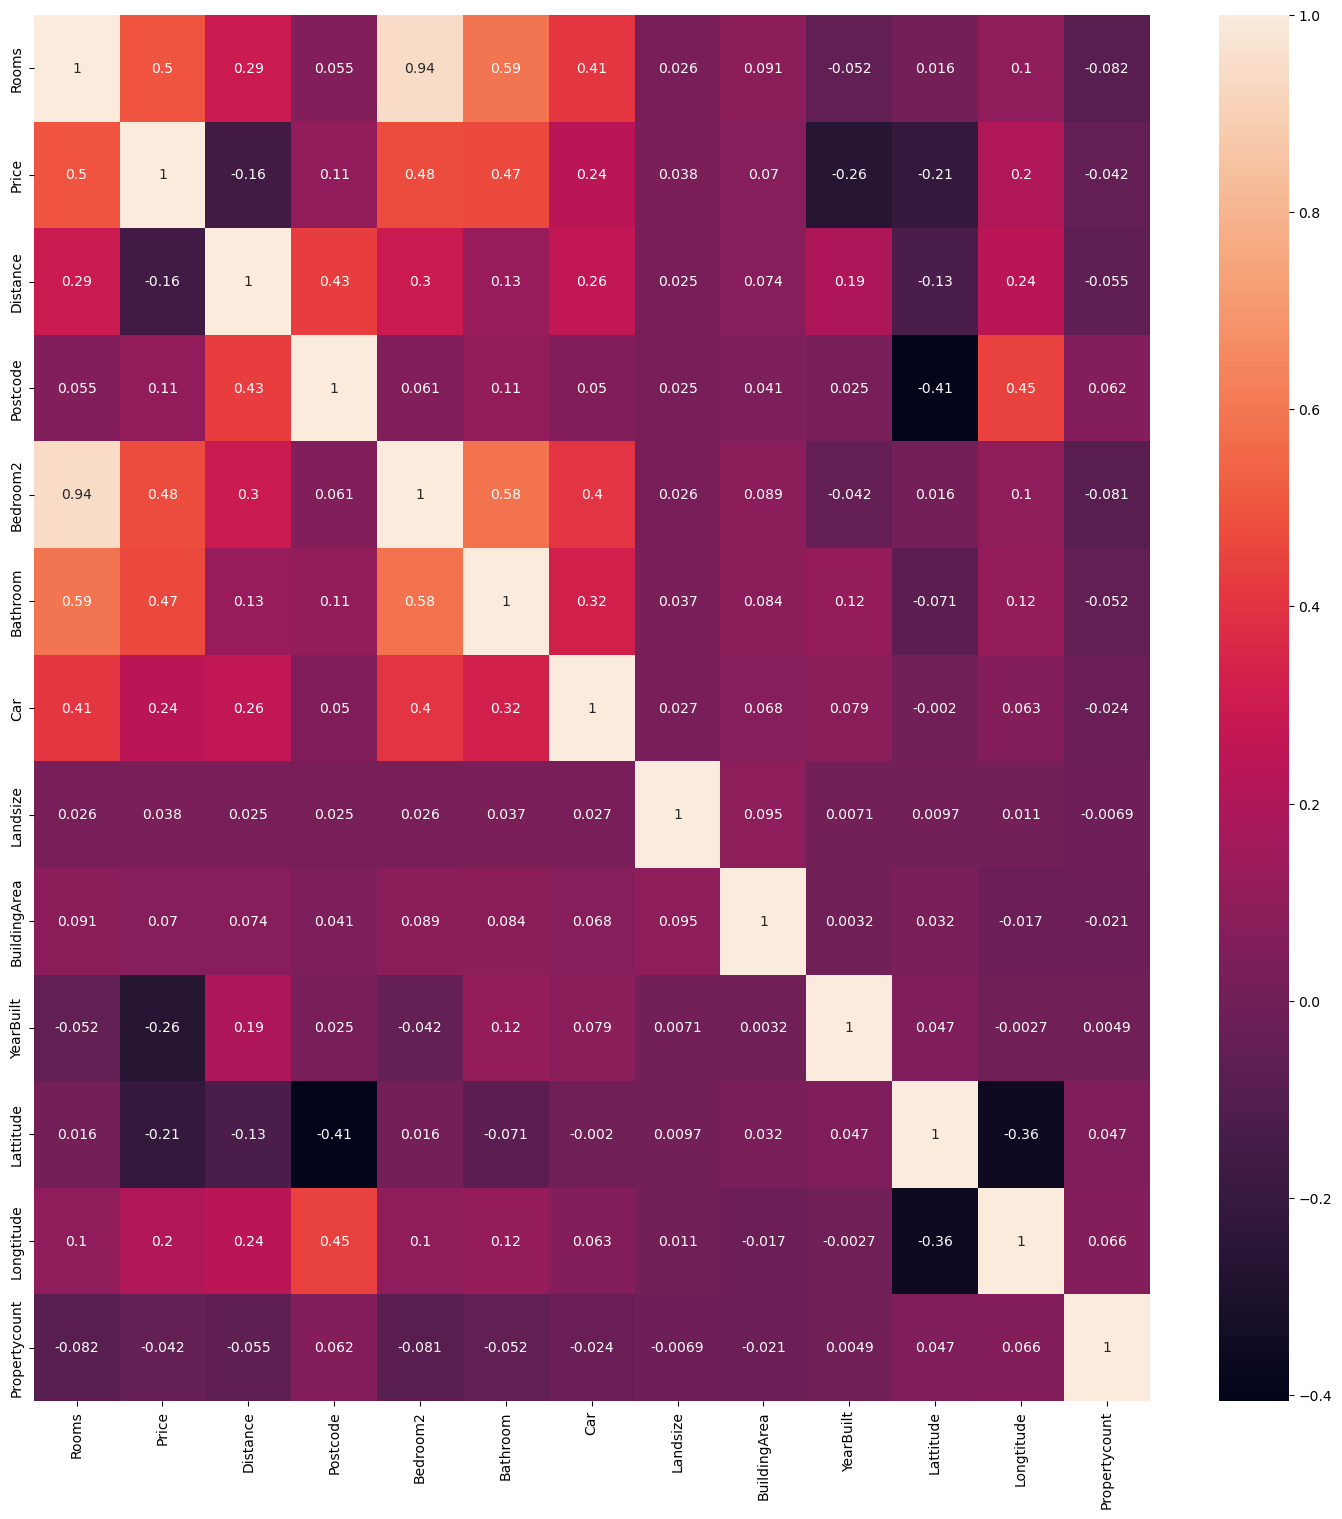

In [189]:
import seaborn as sns
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[numerical_cols].corr(), annot=True)

#### Observation


* Distance, postcode, latitude and longitude are related i choose rooms
* Landsize and building area are correlated i choose landsize
* Rooms, bedroom2 and bathroom are correlated i choose rooms

In [190]:
correlation_drop_list = ['Bedroom2', 'Bathroom', 'Postcode', 'Lattitude', 'Longtitude', 'BuildingArea']
df_correlation = df.drop(correlation_drop_list, axis=1)
df_correlation.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,0.0,12794.0,2,0.0,1480000.0,1.0,23.0,45.0,2.5,1.0,202.0,1964.684217,31.0,2.0,4019.0
1,0.0,5943.0,2,0.0,1035000.0,1.0,23.0,47.0,2.5,0.0,156.0,1900.000000,31.0,2.0,4019.0
2,0.0,9814.0,3,0.0,1465000.0,3.0,23.0,48.0,2.5,0.0,134.0,1900.000000,31.0,2.0,4019.0
3,0.0,9004.0,3,0.0,850000.0,0.0,23.0,48.0,2.5,1.0,94.0,1964.684217,31.0,2.0,4019.0
4,0.0,10589.0,4,0.0,1600000.0,4.0,155.0,49.0,2.5,2.0,120.0,2014.000000,31.0,2.0,4019.0


### Chi Square

In [191]:
from sklearn.feature_selection import chi2, SelectKBest

In [193]:
from sklearn.preprocessing import MinMaxScaler
df['Lattitude'] = MinMaxScaler().fit_transform(np.array(df.Lattitude).reshape(-1,1))

In [194]:
chi2_selector = SelectKBest(score_func=chi2, k='all')
X = df[numerical_cols].drop('Price', axis=1)
chi2_data = chi2_selector.fit_transform(X, df.Price)
for i in range(len(X.columns)):
    print(f"{df[numerical_cols].drop('Price', axis=1).columns[i]}: {chi2_selector.scores_[i]}")

Rooms: 1839.2552913573786
Distance: 8997.199124944656
Postcode: 6973.141307428992
Bedroom2: 1776.2486698025589
Bathroom: 1535.3204904498764
Car: 1726.0815029672874
Landsize: 38379656.38854402
BuildingArea: 1472618.8744421068
YearBuilt: 1412.7342545304684
Lattitude: 60.783071726530565
Longtitude: 0.22241941713033744
Propertycount: 5533700.8327184385


### Mutual information

In [195]:
from sklearn.feature_selection import mutual_info_regression

In [196]:
mutual_info_sc = mutual_info_regression(df[numerical_cols].drop('Price', axis=1), df.Price)

In [199]:
# selection among the numerical columns alone
mutual_info_selector = SelectKBest(score_func=mutual_info_regression, k='all')
X = df[numerical_cols].drop('Price', axis=1)
mutual_info_data = mutual_info_selector.fit_transform(X, df.Price)
for i in range(len(X.columns)):
    print(f"{df[numerical_cols].drop('Price', axis=1).columns[i]}: {mutual_info_selector.scores_[i]}")

Rooms: 0.22094657754287095
Distance: 0.20801536419698863
Postcode: 0.31549165289463676
Bedroom2: 0.2091414286744988
Bathroom: 0.1324505028214884
Car: 0.08502962681792203
Landsize: 0.1432048686296663
BuildingArea: 0.19695448687289385
YearBuilt: 0.09694790315999846
Lattitude: 0.14792645235928514
Longtitude: 0.154351370898981
Propertycount: 0.20346261077500216


#### Random Forest

In [202]:
from sklearn.ensemble import RandomForestRegressor
f = RandomForestRegressor(n_estimators=20, random_state=17)
rf = f.fit(df[numerical_cols].drop('Price', axis=1), df.Price)
rf_feat_importances = rf.feature_importances_
print(rf_feat_importances)

[0.22920112 0.21603208 0.14948276 0.00472542 0.02294297 0.01395178
 0.12309107 0.05409358 0.03712506 0.05644487 0.07288711 0.02002219]


#### Visualizing features

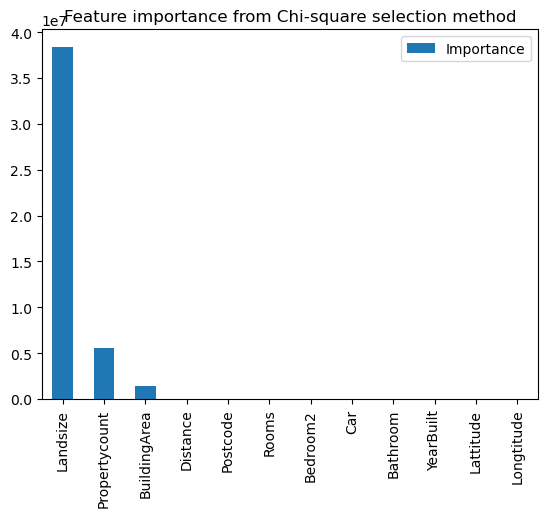

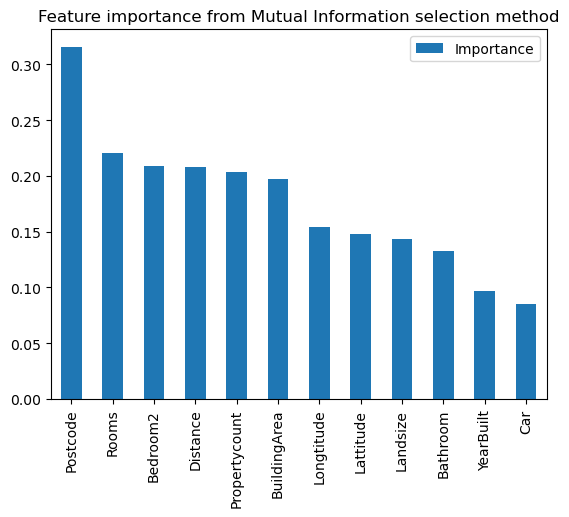

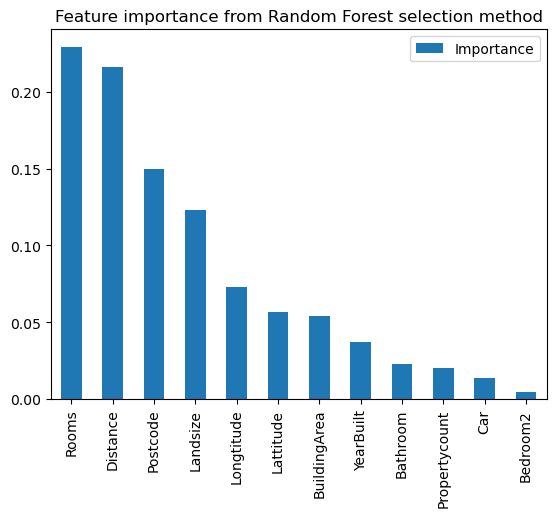

In [203]:
def importances(method, importances):
    feature_importances = pd.DataFrame(importances, index=df[numerical_cols].drop('Price', axis=1).columns, columns=["Importance"])
    feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feature_importances.plot(kind='bar')
    plt.title(f"Feature importance from {method} selection method")
    plt.show()
    
importances("Chi-square", chi2_selector.scores_)
importances("Mutual Information", mutual_info_selector.scores_)
importances("Random Forest", rf_feat_importances)

### Comments on results
Top numerical features 
* Correlation - Rooms,Distance,Car,Landsize,YearBuilt,Propertycount
* Chi-square: Landsize, Propertycount, BuildingArea
* Mutual-Information: Postcode, Rooms,Bedroom2, Distance, Propertycount, BuildingArea, Longtitude, Lattitude
* Random Forest chose: Rooms, Distance, Postcode, Landsize, Longtitude,BuildingArea,YearBuilt, Bathroom

I choose Random forest as best option as Random forest shows better feature selection and importance order.

I choose Chi square as worst option as it doesnt shows better feature selection and importance order for its top three features.